In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import string
from DataReader import DataReader
from Signatures.PatternSignature import PatternSignature
from Feature.RegexFeature import RegexFeature
from Feature.AggregateFeature import AggregateFeature
from Feature.NGramFeature import NGramFeature
from Classifiers.PatternClassificator import PatternClassificator

In [5]:
#DataReader
#Hifsklasse zum Umgang mit Daten
dr = DataReader()
#Dateien pro Datenklasse einlesen einlesen
path = "./Data/"
files = {"Vorname": "Vornamen.txt", "Strasse": "Strasse.txt"}
dr.collect_file_data(path, files)
print(dr.get_data("Vorname", 10))
print(dr.get_data("Strasse", 10))

#oder selbst definieren
data = {"Vorname": ["Hans", "Josef"], "Nachname": ["Schmidt", "Huber"]}
dr = DataReader(data)
print(dr.get_data("Nachname"))

['Anna', 'Max', 'Maria', 'Lukas', 'Lena', 'Leon', 'Laura', 'Finn', 'Emma', 'Felix']
['Junkerstraße', 'Am Hölder', 'Clematisweg', 'Steinpilzweg', 'Paul-Magar-Straße', 'Am Götgesbach', 'Fritz-Schroeder-Ufer', 'Dellweg', 'Im Verbott', 'Am Turmhof']
['Schmidt', 'Huber']


In [6]:
#Regex, NGram oder Aggregate Features

##selber erstellen
datum_regex = RegexFeature(".?*")
##oder vordefinierte Regexe einlesen
rx_feature = RegexFeature.read_features("./Regexes/Strasse.txt", combine=True)

ngram_feature = NGramFeature("an")

aggr_feature = AggregateFeature([c for c in string.ascii_letters])

#Jedes Feature hat eine Testmethode, die einen Datensatz auf einen booleschen Wert abbildet
data = ["Hans", "Josef", "Jürgen"]
for d in data:
    print(d + ': ' + str(ngram_feature.test(d)), end=', ')
print()
data = ["Hauptstraße", "An der Linde", "Am Bahnhof", "Kirchenstr."]
for d in data:
    print(d + ': ' + str(rx_feature.test(d)), end=', ')

Hans: True, Josef: False, Jürgen: False, 
Hauptstraße: False, An der Linde: True, Am Bahnhof: True, Kirchenstr.: True, 

In [10]:
#NGrams koennen wir aus Daten ableiten
data = {"Vorname": ["Bastian", "Christian"], "Strasse": ["Hauptstraße", "Feldstr."]}
dr = DataReader(data)

#Ableitung aller NGrams
print("2grams Vorname: " + str(NGramFeature.get_counted_ngrams(dr.get_data("Vorname"), n=2, relative=True)))
print("2grams Strasse: " + str(NGramFeature.get_counted_ngrams(dr.get_data("Strasse"), n=2, relative=True)))

#Auswahl der 7 besten zur Unterscheidung der Klassen "Vorname" und "Strasse"
rels, ngrams = NGramFeature.calc_top_ngrams(dr, n=2, limit=7)
print("Unterscheidungskraft: " + str(rels))
print("2grams: " + str(ngrams))
#wir sehen zum Beispiel: 'st' wird nicht ausgewaehlt, weil es in beiden Klassen immer vorkommt -> keine Unterscheidungskraft

2grams Vorname: {'Ba': 0.5, 'as': 0.5, 'st': 1.0, 'ti': 1.0, 'ia': 1.0, 'an': 1.0, 'Ch': 0.5, 'hr': 0.5, 'ri': 0.5, 'is': 0.5}
2grams Strasse: {'Ha': 0.5, 'au': 0.5, 'up': 0.5, 'pt': 0.5, 'ts': 0.5, 'st': 1.0, 'tr': 1.0, 'ra': 0.5, 'aß': 0.5, 'ße': 0.5, 'Fe': 0.5, 'el': 0.5, 'ld': 0.5, 'ds': 0.5, 'r.': 0.5}
Unterscheidungskraft: [1.2575150100000045e-13]
2grams: ['ti', 'ia', 'an', 'tr', 'Ba', 'as', 'Ch']


In [22]:
#Das gleiche in einer groesseren Dimension
path = "./Data/"
#files = {"Vorname": "Vornamen.txt", "Nachname": "Nachnamen.txt", "Ort": "Ort.txt", "Strasse": "Strasse.txt", "Stadt": "Stadt.txt"}
files = {"Vorname": "Vornamen.txt", "Nachname": "Nachname.txt", "Ort": "Ort.txt", "Strasse": "Strasse.txt", "Stadt": "Stadt.txt"}
attributes = list(files.keys())
dr = DataReader()
#So oft kommen die NGrams pro Attribut vor:
dr.collect_file_data(path, files)
for attr in attributes:
    ngr = NGramFeature.get_counted_ngrams(dr.get_data(attr), n=2, relative=True)
    ngr = {k: round(v, 2) for k, v in sorted(ngr.items(), key=lambda item: item[1], reverse=True)}
    print(attr + ": ", ngr)
#Die optimale Menge betraegt dann:
rel2, opt_2grams = NGramFeature.calc_top_ngrams(dr, n=2, limit=100)
rel3, opt_3grams = NGramFeature.calc_top_ngrams(dr, n=3, limit=100)
#Unterscheidungskraft pro Attributpaar
#wir sehen: wir koennen "Ort" und "Stadt" am schlechtesten Unterscheiden
k = 0
for i in range(len(attributes)):
    for j in range(i + 1, len(attributes)):
        print(f'{attributes[i] + " : " + attributes[j]:<20}' + "\t2gram: %2f 3gram: %2f" % (rel2[k], rel3[k]))
        k += 1
    
print(opt_2grams)
print(opt_3grams)

Vorname:  {'an': 0.37, 'ia': 0.29, 'ri': 0.16, 'as': 0.13, 'is': 0.12, 'ar': 0.12, 'ti': 0.12, 'st': 0.11, 'Ma': 0.11, 'in': 0.11, 'Ja': 0.1, 'na': 0.1, 'ni': 0.1, 'li': 0.09, 'ie': 0.09, 'ra': 0.09, 'hr': 0.09, 'el': 0.09, 'Ch': 0.09, 'bi': 0.07, 'ob': 0.07, 'To': 0.07, 'au': 0.07, 'La': 0.06, 'ur': 0.06, 'An': 0.05, 'nn': 0.05, 'im': 0.05, 'la': 0.05, 'mi': 0.04, 'il': 0.04, 'te': 0.04, 'en': 0.04, 'nd': 0.04, 'St': 0.04, 'sa': 0.04, 'ne': 0.04, 'ax': 0.03, 'ha': 0.03, 'le': 0.03, 'ef': 0.03, 'xi': 0.03, 'Sa': 0.03, 'fa': 0.03, 'ic': 0.03, 'ja': 0.03, 'eb': 0.03, 'er': 0.03, 'Me': 0.03, 'di': 0.03, 'Se': 0.03, 'ul': 0.03, 'Li': 0.03, 'ba': 0.03, 'rc': 0.03, 'Ju': 0.02, 'ah': 0.02, 'co': 0.02, 'Al': 0.02, 'nj': 0.02, 'Mi': 0.02, 'on': 0.02, 'at': 0.02, 'Na': 0.02, 'ad': 0.02, 'ex': 0.02, 'xa': 0.02, 'de': 0.02, 'Ka': 0.02, 'Da': 0.02, 'Ca': 0.02, 'Le': 0.02, 'dr': 0.02, 'ea': 0.01, 'ch': 0.01, 'ph': 0.01, 'th': 0.01, 'hi': 0.01, 'Cl': 0.01, 'es': 0.01, 'Jo': 0.01, 'vi': 0.01, 'Ni': 0.

In [18]:
#Signatur
path = "./Data/"
files = {"Vorname": "Vorname.txt", "Nachname": "Nachname.txt", "Ort": "Ort.txt", "Strasse": "Strasse.txt", "Stadt": "Stadt.txt"}
attributes = list(files.keys())
dr = DataReader()
dr.collect_file_data(path, files)
rels, ngrams = NGramFeature.calc_top_ngrams(dr, n=2, limit=200)
print(ngrams)
ngram_features = [NGramFeature(ngr) for ngr in ngrams]

sig = PatternSignature(attributes=attributes, features=ngram_features)
sig.learn_signatures(dr)
#Klassifizierung
#Mit nur einem Testwert nicht sehr gut
pc = PatternClassificator(sig)
print("1 Testwert")
print(pc.classify_attributes(["Christian"]))
print(pc.classify_attributes(["Schmidt"]))
print(pc.classify_attributes(["Römerstraße"]))
print("3 Testwerte")
print(pc.classify_attributes(["Bastian", "Josef", "Hans"]))
print(pc.classify_attributes(["Hauptstraße", "An der Linde", "Bahnhofstraße"]))
print(pc.classify_attributes(["Landshut", "Hamburg", "Frankfurt"]))


['er', 'en', 'ad', 'rg', 'd ', 'Ba', 'we', 'nk', 'ls', 'ch', 'be', 'he', 'bu', 'le', 'au', 'ol', 'eb', 'st', 'He', 'ur', 'at', 'ai', 'ni', 'ac', 'id', 'ec', 'nb', 'li', 'ba', 'ei', 'wa', 'Ma', 've', 'ig', 'or', 'rb', 'ir', 'rf', 'ss', 'ah', 'rd', 'mb', 'ia', 'ta', 'Ge', 'ts', 'Gr', 'Wi', 'rl', 'pe', 'it', 'na', 'rt', 'do', 'eu', 'al', 'dt', 'ri', 'es', 'el', 'tz', 'Sc', 'sh', 'il', 'ck', 'an', 'm ', 'll', 'ns', 'Wa', 'se', 'sc', 'nh', 'ho', 'im', 'ke', ' a', 'rn', 'ra', 'ge', 'ar', 'sb', 'Ne', 'ed', 'ld', 'la', 'ha', 'ie', 'Ha', 'te', 'ic', 'lb', 'ro', 'nn', 'rs', 'de', 'tt', 'is', 'St', 'La', 'n ', 're', 'hl', 'am', 'ng', 'ne', 'us', 'We', 'fe', 'et', 'nd', 'un', 'Be', 'th', 'in', 'on', 'as', 'mi', 'Le', 'sa', 'Jo', 'Mi', 'ya', 'Al', 'El', 'Li', 'ti', 'ma', 'An', 'lo', 'da', 'Ja', 'eo', 'ik', 'hi', 'Sa', 'nt', 'Lu', 'no', 'ea', 'os', 'Me', 'ab', 'Ka', 'ay', 'ul', 'to', 'io', 'Em', 'me', 'Ro', 'ey', 'Ca', 'ka', 'Ju', 'Fr', 'em', 'Lo', 'Da', 'Am', 'Ch', 'dr', 'hr', 'hn', 'hm', 'Re', 'mm

In [20]:
#Mit realistischen Mengen von Testwerten
#Grundsaetzlich: je groesser die Menge desto besser
#Je nach Attributen und Features bei ca. 150 - 200 Datensaetzen gute Ergebnisse
dr_train, dr_test = dr.split_all(2, shuffle=True)
rel, ngrams = NGramFeature.calc_top_ngrams(dr_train, n=3, limit=200)
ngram_features = [NGramFeature(ngr) for ngr in ngrams]

sig = PatternSignature(attributes=attributes, features=ngram_features)
sig.learn_signatures(dr)
pc = PatternClassificator(sig)
for attr in attributes:
    print(attr + ": " + str(pc.classify_attributes(dr_test.get_data(attr), sample_size=200)))

Vorname: {'Vorname': 0.9297605806833392, 'Nachname': 0.6629083371215259, 'Ort': 0.568452450080097, 'Strasse': 0.5435467892163759, 'Stadt': 0.5759557008221328}
Nachname: {'Vorname': 0.6785117252058023, 'Nachname': 0.9465527856667513, 'Ort': 0.7572978661512069, 'Strasse': 0.7669653302160014, 'Stadt': 0.7086721087426676}
Ort: {'Vorname': 0.6014392443149914, 'Nachname': 0.7862644876596472, 'Ort': 0.9702545723404392, 'Strasse': 0.8132292990505805, 'Stadt': 0.9330903883491857}
Strasse: {'Vorname': 0.5678031819996829, 'Nachname': 0.7106155217169338, 'Ort': 0.7604968217822063, 'Strasse': 0.9635892208005447, 'Stadt': 0.7641506580524399}
Stadt: {'Vorname': 0.5945957789171391, 'Nachname': 0.7434308643013116, 'Ort': 0.9332947505720934, 'Strasse': 0.8088934191133136, 'Stadt': 0.9689830425283209}


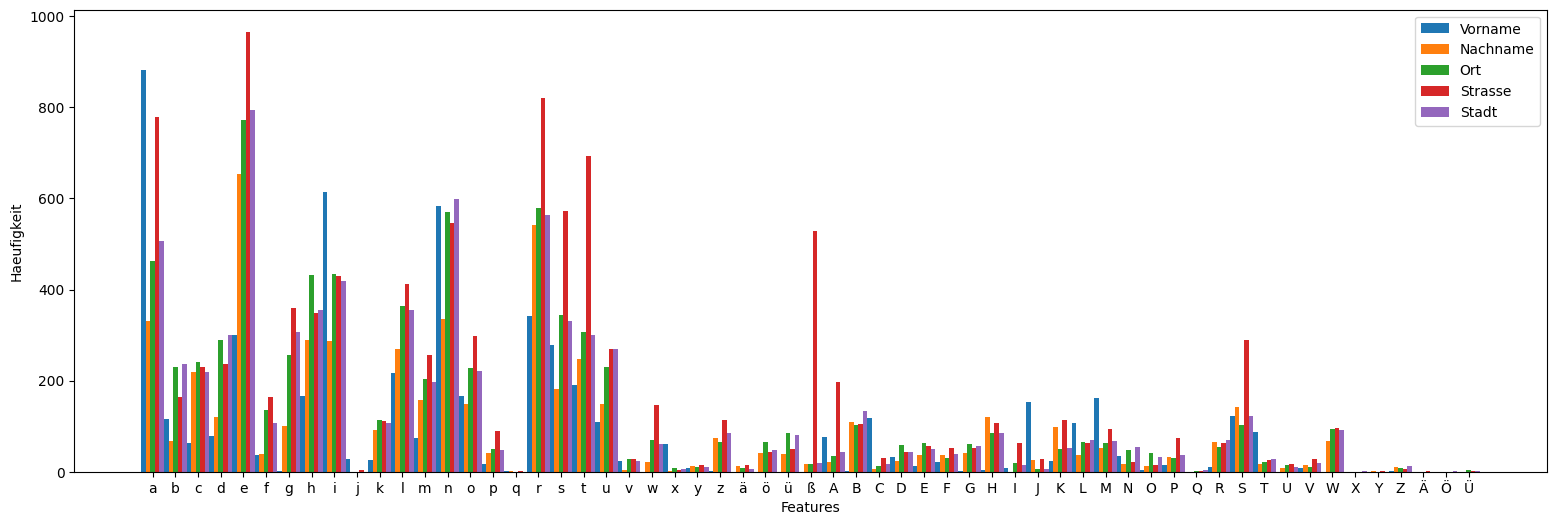

In [24]:
#Interessante Beobachtung: auch fuer sehr triviale Features funktionert die Klassifizierung fuer grosse Datenmengen
#Beispiel
path = "./Data/"
files = {"Vorname": "Vornamen.txt", "Nachname": "Nachname.txt", "Ort": "Ort.txt", "Strasse": "Strasse.txt", "Stadt": "Stadt.txt"}
attributes = list(files.keys())
dr = DataReader()
dr.collect_file_data(path, files)

aggr_feature = AggregateFeature.create_lowercase_letter_features() + AggregateFeature.create_uppercase_letter_features()

#wir zaehlen die Buchstabenhaeufigkeit pro Klasse
sig = PatternSignature(attributes=attributes, features=aggr_feature)
sig.learn_signatures(dr)
attr_matches = {}
for attr in attributes:
    vec = [0 for _ in aggr_feature]
    data = dr.get_data(attr, 1000)
    for dt in data:
        for i, ft in enumerate(aggr_feature):
            vec[i] += ft.test(dt)
    attr_matches[attr] = vec

figure(figsize=(19, 6))
x_axis = np.arange(len(aggr_feature))
lts = [af.pattern[0] for af in aggr_feature]
plt.bar(x_axis - 0.4, attr_matches["Vorname"], 0.2, label="Vorname")
plt.bar(x_axis - 0.2, attr_matches["Nachname"], 0.2, label="Nachname")
plt.bar(x_axis, attr_matches["Ort"], 0.2, label="Ort")
plt.bar(x_axis + 0.2, attr_matches["Strasse"], 0.2, label="Strasse")
plt.bar(x_axis + 0.4, attr_matches["Stadt"], 0.2, label="Stadt")
plt.xticks(x_axis, lts)
plt.xlabel("Features")
plt.ylabel("Haeufigkeit")
plt.legend()
plt.show()
#wir sehen: bis auf einige Ausnahmen (z.B. ß, s, S, t, r in Strassennamen) kein wirkliches Muster in der Buchstabenverteilung erkennbar

In [35]:
#trotzdem kann mit einfachem Buchstabenzaehlen ein ziemlich zuverlaessiger Klassifizierer erstellt werden
path = "./Data/"
files = {"Vorname": "Vornamen.txt", "Nachname": "Nachname.txt", "Ort": "Ort.txt", "Strasse": "Strasse.txt", "Stadt": "Stadt.txt"}
attributes = list(files.keys())
dr = DataReader()
dr.collect_file_data(path, files)

#Features fuer alle Groß-& Kleinbuchstaben
aggr_feature = AggregateFeature.create_lowercase_letter_features() + AggregateFeature.create_uppercase_letter_features() + AggregateFeature.create_aggregate_features()

dr_train, dr_test = dr.split_all(2)
sig = PatternSignature(attributes=attributes, features=aggr_feature)
sig.learn_signatures(dr_train)
pc = PatternClassificator(sig)
for attr in attributes:
    #300 Testwerte
    probs = pc.classify_attributes(dr.get_data(attr, samples=300))
    expected_attr = max(probs, key=probs.get)
    print(f'{"Tested: " + attr:<20}' + f'{"Result: "  + expected_attr:<20}' + " Values: " + str(probs))

Tested: Vorname     Result: Vorname      Values: {'Vorname': 0.9977874547571192, 'Nachname': 0.7711356745182011, 'Ort': 0.7413951772049127, 'Strasse': 0.612003863168136, 'Stadt': 0.7418485008102829}
Tested: Nachname    Result: Nachname     Values: {'Vorname': 0.7638570960661946, 'Nachname': 0.9948654182325817, 'Ort': 0.9339007454758215, 'Strasse': 0.7693420159178195, 'Stadt': 0.9265201721534172}
Tested: Ort         Result: Ort          Values: {'Vorname': 0.7360208041194152, 'Nachname': 0.9357686763615514, 'Ort': 0.9975069244318252, 'Strasse': 0.8692475562152832, 'Stadt': 0.987851724188198}
Tested: Strasse     Result: Strasse      Values: {'Vorname': 0.6167670537313077, 'Nachname': 0.788201641424989, 'Ort': 0.8621310397487535, 'Strasse': 0.9965963218649486, 'Stadt': 0.8705549886447846}
Tested: Stadt       Result: Stadt        Values: {'Vorname': 0.7258095106214911, 'Nachname': 0.93256582700742, 'Ort': 0.9866168500239544, 'Strasse': 0.8774337660397596, 'Stadt': 0.9965539663205283}
